In [1]:
!pip install pyswarm
!pip install shap

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4518 sha256=dcd4d380bb08f0da433213b86f12e2df1ec4bbaededb023a396af1d812b618d9
  Stored in directory: /root/.cache/pip/wheels/93/15/89/3970ef96abd6123028010a90f007c4e6a2bed700db0aa2d36a
Successfully built pyswarm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00


In [2]:
# === Data manipulation and preprocessing ===
import pandas as pd
import numpy as np
import random
import os
import time

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(suppress=True)

# === Scaling and model evaluation ===
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    silhouette_score,
    calinski_harabasz_score
)

# === Dimensionality reduction and clustering ===
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# === PyTorch - Neural Network and DataLoader ===
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# === Optimization ===
from pyswarm import pso


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Only needed if you're loading data from Google Drive

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df_2017_2020 = pd.read_csv("/content/drive/MyDrive/Network Maintenace - With & without maintenace/encoded-data/No-main-encoded-dataset-2017-2019/df_encoded_no-main_2017_2019.csv")

In [6]:
df_2017_2020.shape

(6444, 23)

In [7]:
df_2017_2020.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0        40961                    820.0                   2295.0   
1        26595                    878.0                    186.0   
2        61960                    744.0                   2851.0   
3        52563                   1052.0                   2997.0   
4        13206                    211.0                   1267.0   
5        16978                    238.0                   1443.0   
6        21647                    455.0                   5196.0   
7       100449                   2008.0                   5725.0   
8        11524                    300.0                    426.0   
9         2582                     46.0                     42.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0             40924.0        64.0                    11.5   
1             37230.0       172.8                     0.0   
2             62225.0       102.8                     9.0   
3             52581.0        65.5                    11.0   
4             13222.0        55.0                     0.0   
5             16999.0        53.3                     0.0   
6             21703.0        58.0                    12.0   
7            100481.0        67.0                    10.0   
8             12624.0       239.0                     0.0   
9              2583.0       178.3                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        0.0                   15.0              1   
1                        3.0                    6.0              3   
2                        0.0                   18.0              2   
3                        0.0                   16.0              1   
4                        5.0                   24.0              1   
5                        5.0                   24.0              1   
6                        0.0                   18.0              1   
7                        0.0                   26.0              2   
8                        6.0                    6.0              5   
9                        3.0                    6.0              5   

   Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0                  3                 2             0.0   
1                  2                 3             0.2   
2                  3                 2             0.0   
3                  3                 2             0.0   
4                  2                 2             0.1   
5                  2                 2             0.1   
6                  3                 2             0.0   
7                  3                 2             0.0   
8                  2                 2             0.2   
9                  2                 2             0.1   

   Cracking_Percent_mean_x  Faulting_mean_x  IRI_mean_y  RHU_AV_x  FRZ_IDX_x  \
0                      0.0              0.0        71.5      76.2      535.4   
1                      0.0              0.0       198.8      67.1        3.7   
2                     23.0              0.1       123.0      76.2      519.1   
3                      0.0              0.0        75.0      76.4      504.3   
4                      0.0              0.0        68.0      78.5      769.2   
5                      0.0              0.0        55.0      78.5      769.2   
6                      0.0              0.0        61.0      78.6      272.6   
7                      0.0              0.0        70.5      76.3      457.0   
8                      0.0              0.0       250.0      78.8      295.2   
9                     20.0              0.0       184.0      78.8      295.2   

   TEMP_AVG_x  PRECIPITATION_x  Age_x  Urban_Type_rural  \
0         8.5           1068.6      5               0.0   
1        19.6            933.1     16               0.0   
2         8.7           1083.9      6               0.0   
3         8.3            963.7      4               0.0

In [8]:
df_2017_2020.isnull().sum()

AADT_mean_x                   0
AADT_Single_Unit_mean_x       0
AADT_Combination_mean_x       0
Future_AADT_mean_x            0
IRI_mean_x                    0
Thickness_Rigid_mean_x        0
Thickness_Flexible_mean_x     0
Base_Thickness_mean_x         0
F_System_mode                 0
Surface_Type_mode             0
Base_Type_mode_x              0
Rutting_mean_x                0
Cracking_Percent_mean_x       0
Faulting_mean_x               0
IRI_mean_y                    0
RHU_AV_x                     12
FRZ_IDX_x                    12
TEMP_AVG_x                   12
PRECIPITATION_x              12
Age_x                         0
Urban_Type_rural              0
Urban_Type_small urban        0
Urban_Type_urban              0
dtype: int64

In [9]:
df = df_2017_2020.dropna()

In [10]:
df.shape

(6432, 23)

In [11]:
df.columns

Index(['AADT_mean_x', 'AADT_Single_Unit_mean_x', 'AADT_Combination_mean_x',
       'Future_AADT_mean_x', 'IRI_mean_x', 'Thickness_Rigid_mean_x',
       'Thickness_Flexible_mean_x', 'Base_Thickness_mean_x', 'F_System_mode',
       'Surface_Type_mode', 'Base_Type_mode_x', 'Rutting_mean_x',
       'Cracking_Percent_mean_x', 'Faulting_mean_x', 'IRI_mean_y', 'RHU_AV_x',
       'FRZ_IDX_x', 'TEMP_AVG_x', 'PRECIPITATION_x', 'Age_x',
       'Urban_Type_rural', 'Urban_Type_small urban', 'Urban_Type_urban'],
      dtype='object')

In [12]:
df.columns

Index(['AADT_mean_x', 'AADT_Single_Unit_mean_x', 'AADT_Combination_mean_x',
       'Future_AADT_mean_x', 'IRI_mean_x', 'Thickness_Rigid_mean_x',
       'Thickness_Flexible_mean_x', 'Base_Thickness_mean_x', 'F_System_mode',
       'Surface_Type_mode', 'Base_Type_mode_x', 'Rutting_mean_x',
       'Cracking_Percent_mean_x', 'Faulting_mean_x', 'IRI_mean_y', 'RHU_AV_x',
       'FRZ_IDX_x', 'TEMP_AVG_x', 'PRECIPITATION_x', 'Age_x',
       'Urban_Type_rural', 'Urban_Type_small urban', 'Urban_Type_urban'],
      dtype='object')

In [13]:
num_dupes = df.duplicated(keep=False).sum()
print(f"Duplicate rows in df (all columns considered): {num_dupes}")

Duplicate rows in df (all columns considered): 2


In [14]:
# --- Remove duplicate rows across all columns ---
initial_rows = len(df)

df.drop_duplicates(inplace=True)   # modifies df in place

print(f"Duplicates removed: {initial_rows - len(df)}")
print(f"New DataFrame shape: {df.shape}")


Duplicates removed: 1
New DataFrame shape: (6431, 23)


/tmp/ipython-input-3110374706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)   # modifies df in place


In [15]:
df.shape

(6431, 23)

In [16]:
# ==== SETUP ====
save_dir = "/content/drive/MyDrive/Network Maintenace - With & without maintenace/outputs/outputs-no-maintain-2017-2019/pso-Recommended-ANN-2017-2019-(Maintenance)-Minmax-scaler"
os.makedirs(save_dir, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [17]:
X = df.drop(columns=['IRI_mean_y'])  # Drop target column to keep 21 input features
y = df[['IRI_mean_y']]               # Target stays (N, 1)

In [18]:
y.shape

(6431, 1)

In [19]:
print(X.shape)  # Should be (4060, 21)
print(y.shape)  # Should be (4060, 1)

(6431, 22)
(6431, 1)


In [20]:
type(y)

pandas.core.frame.DataFrame

In [21]:
# Train/val/test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
print(X_test.shape)

(965, 22)


In [23]:
print(X_train.shape)  # Should be [num_samples, 26]
print(y_train.shape)  # Should be [num_samples, 1] or [num_samples]

(4501, 22)
(4501, 1)


In [24]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_val_scaled = scaler_x.transform(X_val)
X_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

X_train_unscaled_df = X_train.copy().reset_index(drop=True)
X_test_unscaled_df = X_test.copy().reset_index(drop=True)

In [25]:
X_test_unscaled_df.shape

(965, 22)

In [26]:
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_scaled, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_val_t = torch.tensor(X_val_scaled, dtype=torch.float32).to(device)
y_val_t = torch.tensor(y_val_scaled, dtype=torch.float32).to(device)

In [27]:
## Build Model
class ANNModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.Linear_relu_stack = nn.Sequential(
        nn.Linear(in_features=22, out_features=35, bias=True),   # hidden layer 1 with 25 neurons
        nn.ReLU(),
        nn.Linear(in_features=35, out_features=1) ## output layer
    )

  def forward(self, x):
    return self.Linear_relu_stack(x) ## x is just the name of the parameter representing input data in that function.

## initiate model and send model to device

model = ANNModel().to(device)


In [28]:
## Loss function
criterion = nn.MSELoss()

## Optimizer: Adam
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [29]:
# === Set paths ===
best_model_path = best_model_path = "/content/drive/MyDrive/Network Maintenace - With & without maintenace/outputs/outputs-no-maintain-2017-2019/pso-Recommended-ANN-2017-2019-(Maintenance)-Minmax-scaler/best_ann_model.pt"
loss_plot_path =  "/content/drive/MyDrive/Network Maintenace - With & without maintenace/outputs/outputs-no-maintain-2017-2019/pso-Recommended-ANN-2017-2019-(Maintenance)-Minmax-scaler"

# === Initialize containers ===
train_losses = []
val_losses = []
best_loss = float('inf')
counter = 0
patience = 100
min_delta = 1e-4
epochs = 3000

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_batch.size(0)

    avg_train_loss = epoch_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # === Validation ===
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_t)
        val_loss = criterion(val_outputs, y_val_t).item()
        val_losses.append(val_loss)

    # === Early stopping ===
    if val_loss < best_loss - min_delta:
        best_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), best_model_path)
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {avg_train_loss:.6f} - Val Loss: {val_loss:.6f}")

Epoch [1/3000] - Train Loss: 0.036672 - Val Loss: 0.025749
Epoch [2/3000] - Train Loss: 0.025068 - Val Loss: 0.022906
Epoch [3/3000] - Train Loss: 0.022601 - Val Loss: 0.020899
Epoch [4/3000] - Train Loss: 0.020866 - Val Loss: 0.019441
Epoch [5/3000] - Train Loss: 0.019478 - Val Loss: 0.018295
Epoch [6/3000] - Train Loss: 0.018367 - Val Loss: 0.017289
Epoch [7/3000] - Train Loss: 0.017433 - Val Loss: 0.016467
Epoch [8/3000] - Train Loss: 0.016599 - Val Loss: 0.015800
Epoch [9/3000] - Train Loss: 0.015857 - Val Loss: 0.015045
Epoch [10/3000] - Train Loss: 0.015147 - Val Loss: 0.014403
Epoch [11/3000] - Train Loss: 0.014472 - Val Loss: 0.013769
Epoch [12/3000] - Train Loss: 0.013824 - Val Loss: 0.013180
Epoch [13/3000] - Train Loss: 0.013222 - Val Loss: 0.012636
Epoch [14/3000] - Train Loss: 0.012634 - Val Loss: 0.012106
Epoch [15/3000] - Train Loss: 0.012070 - Val Loss: 0.011613
Epoch [16/3000] - Train Loss: 0.011551 - Val Loss: 0.011131
Epoch [17/3000] - Train Loss: 0.011050 - Val Loss

In [30]:
# 📉 Loss Curve
# ==============================
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss Curve 3-year IRI Prediction Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# ================================
# 🔁 Predict on Training Dataset
# ================================
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)

with torch.no_grad():
    y_pred_train = model(X_train_t).cpu().numpy()

# Inverse transform to get actual scale
y_pred_train = scaler_y.inverse_transform(y_pred_train)
y_true_train = y_train.values


In [32]:
# ==============================
# 🔁 Predict on Testing Dataset
# ==============================
model.load_state_dict(torch.load(best_model_path))
model.eval()

X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

with torch.no_grad():
    y_pred_test = model(X_test_t).cpu().numpy()

y_pred_test = scaler_y.inverse_transform(y_pred_test)
y_true_test = y_test.values

In [33]:
# Merge predictions
X_test_unscaled_df['Actual_IRI'] = y_true_test.flatten()
X_test_unscaled_df['Predicted_IRI'] = y_pred_test.flatten()
X_test_unscaled_df.to_csv("evaluated_test_set_with_predictions.csv", index=False)

In [34]:
## No duplicates are here. when you compare x_test with df there are some duplicate issues.
X_test_unscaled_df.shape

(965, 24)

In [35]:
# Columns that exist in both dataframes
shared_cols = X_test_unscaled_df.columns.intersection(df.columns)

# Align order using only those shared columns
X_aligned = X_test_unscaled_df[shared_cols]
df_aligned = df[shared_cols]

# Inner‑merge on all shared columns to find matching rows
matched_df = pd.merge(X_aligned, df_aligned, how='inner')

print(f"Number of matching rows: {len(matched_df)}")

Number of matching rows: 967


In [36]:
# 1 — how many duplicates per frame on the shared columns?
dupes_X  = X_aligned.duplicated(keep=False).sum()
dupes_df = df_aligned.duplicated(keep=False).sum()
print(f"Rows in X_aligned that repeat:  {dupes_X}")
print(f"Rows in df_aligned that repeat: {dupes_df}")

# 2 — show the specific feature rows that drive the inflation
inflaters = (
    pd.concat([
        X_aligned.assign(src='X'),
        df_aligned.assign(src='df')
    ])
    .groupby(list(shared_cols), as_index=False)
    .size()
    .query('size > 1')  # occurs >1× across combined data
    .sort_values('size', ascending=False)
)

Rows in X_aligned that repeat:  0
Rows in df_aligned that repeat: 10


In [37]:
# ==== Metrics Function ====
def calculate_metrics(y_true, y_pred, name="Model"):
    n = len(y_true)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    mae = np.mean(np.abs(y_true - y_pred))
    epsilon = 1e-10
    mape = (100 / n) * np.sum(np.abs((y_true - y_pred) / (y_true + epsilon)))
    vaf = (1 - np.var(y_true - y_pred) / np.var(y_true)) * 100
    rsr = rmse / np.sqrt(np.mean((y_true - np.mean(y_true))**2))
    wmap = (np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))) * 100
    m20 = np.sum(np.abs(y_true - y_pred) <= 0.2 * np.abs(y_true))
    a20index = m20 / n

    # Print results
    print(f"🔹 {name}:")
    print(f"   R²       = {r2:.4f}")
    print(f"   RMSE     = {rmse:.4f}")
    print(f"   MAE      = {mae:.4f}")
    print(f"   MAPE     = {mape:.4f}%")
    print(f"   VAF      = {vaf:.4f}%")
    print(f"   RSR      = {rsr:.4f}")
    print(f"   WMAPE    = {wmap:.4f}%")
    print(f"   a20index = {a20index:.4f}")

    return rmse, r2, mae, mape, vaf, rsr, wmap, a20index

# Example usage
rmse, r2, mae, mape, vaf, rsr, wmap, a20index = calculate_metrics(y_true_test, y_pred_test, name="Test Model")


🔹 Test Model:
   R²       = 0.9065
   RMSE     = 17.6021
   MAE      = 11.1221
   MAPE     = 10.2717%
   VAF      = 90.7524%
   RSR      = 0.3057
   WMAPE    = 10.0760%
   a20index = 0.8819


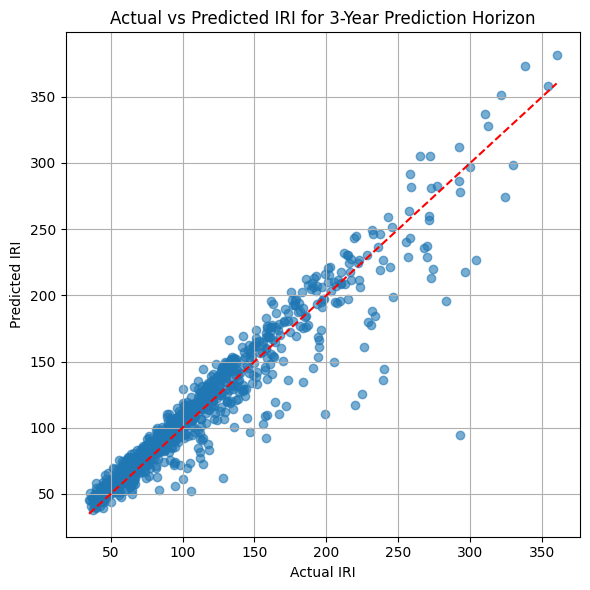

In [38]:
# ==============================
# 📊 Scatter Plot
# ==============================
plt.figure(figsize=(6, 6))
plt.scatter(y_true_test, y_pred_test, alpha=0.6)
plt.plot([y_true_test.min(), y_true_test.max()],
         [y_true_test.min(), y_true_test.max()], 'r--')
plt.xlabel("Actual IRI")
plt.ylabel("Predicted IRI")
plt.title("Actual vs Predicted IRI for 3-Year Prediction Horizon")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "scatter_actual_vs_predicted_2_year.png"))
plt.show()
